In [18]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

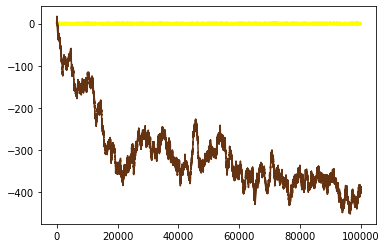

In [19]:
N = 100_000
whiteNoise = np.random.randn(N)
brownNoise = np.cumsum(whiteNoise)

plt.plot(whiteNoise, color=[1,1,0])
plt.plot(brownNoise, color=[.4,.2,.07])
plt.show()

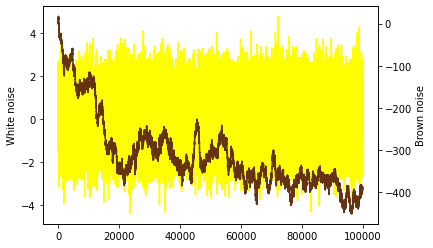

In [20]:
fig,ax = plt.subplots(1)
ax.plot(whiteNoise, color=[1,1,0])
ax.set_ylabel('White noise')

twin = ax.twinx()
twin.set_ylabel('Brown noise')
twin.plot(brownNoise, color=[.4,.2,.07])

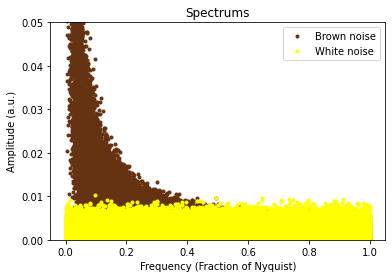

In [21]:
whiteNoiseX = np.abs(fftpack.fft(whiteNoise)) / N
brownNoiseX = np.abs(fftpack.fft(brownNoise)) / N

frequencies = np.linspace(0,1,(N//2) + 2)

plt.plot(frequencies, brownNoiseX[:len(frequencies)], '.', color=[.4,.2,.07], label="Brown noise")
plt.plot(frequencies, whiteNoiseX[:len(frequencies)], '.', color=[1.,1., 0.], label="White noise")
plt.ylim(0,.05)
plt.xlabel('Frequency (Fraction of Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.title('Spectrums')
plt.legend()

plt.show()

In [22]:
# Pink and blue noise

In [31]:
fcAmplitudes = (1 / (frequencies + 0.01)) + 5 * np.random.randn((N//2) + 2)**2
fcPhases = np.random.rand((N//2) + 2) * 2 * np.pi

fourierSpect = np.zeros(N, dtype=complex)
fourierSpect[:N//2 + 2] = fcAmplitudes * np.exp(1j*fcPhases)

pinkNoiseTimeDomain = np.real(fftpack.ifft(fourierSpect))

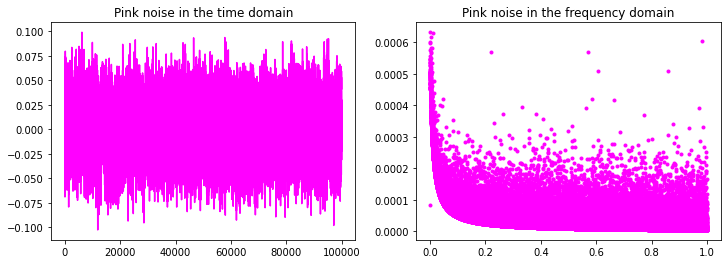

In [34]:
pinkNoiseX = np.abs(fftpack.fft(pinkNoiseTimeDomain)) / N

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(pinkNoiseTimeDomain,color=[1,0,1])
ax[0].set_title('Pink noise in the time domain')
ax[1].plot(frequencies,pinkNoiseX[:len(frequencies)],'.',color=[1,0,1])
ax[1].set_title('Pink noise in the frequency domain')

plt.show()

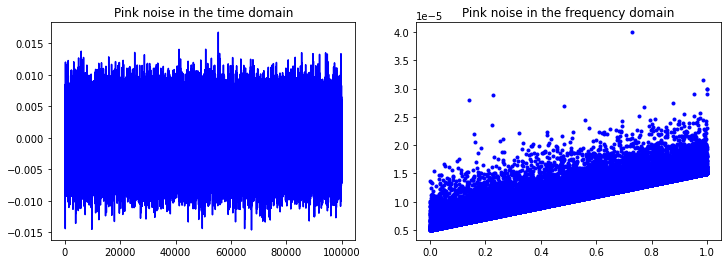

In [36]:
fcAmplitudes = np.linspace(1,3,N//2 + 2) + np.random.randn((N//2) + 2)**2 / 5
fcPhases = np.random.rand((N//2) + 2) * 2 * np.pi

fourierSpect = np.zeros(N, dtype=complex)
fourierSpect[:N//2 + 2] = fcAmplitudes * np.exp(1j*fcPhases)

blueNoiseTimeDomain = np.real(fftpack.ifft(fourierSpect))

blueNoiseX = np.abs(fftpack.fft(blueNoiseTimeDomain)) / N

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(blueNoiseTimeDomain,color=[0,0,1])
ax[0].set_title('Pink noise in the time domain')
ax[1].plot(frequencies,blueNoiseX[:len(frequencies)],'.',color=[0,0,1])
ax[1].set_title('Pink noise in the frequency domain')

plt.show()